#### Setting up Environment

In [1]:
import math, os, warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

file_path = r"C:\Users\Khalid Mohammad\Projects\heart_failure_dataset.csv"

### Importing dataset into a DataFrame

In [2]:
df = pd.read_csv(file_path)

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
df.rename(columns = {"time": "days_survived", "creatinine_phosphokinase": "CPK", "ejection_fraction": "EF" }, inplace=True)

In [12]:
print("Shape: ", df.shape)

df.head()

df.info()

df.describe()

Shape:  (299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  299 non-null    int64   
 1   anaemia              299 non-null    int64   
 2   CPK                  299 non-null    int64   
 3   diabetes             299 non-null    category
 4   EF                   299 non-null    int64   
 5   high_blood_pressure  299 non-null    category
 6   platelets            299 non-null    float64 
 7   serum_creatinine     299 non-null    float64 
 8   serum_sodium         299 non-null    int64   
 9   sex                  299 non-null    category
 10  smoking              299 non-null    category
 11  days_survived        299 non-null    int64   
 12  DEATH_EVENT          299 non-null    category
dtypes: category(5), float64(2), int64(6)
memory usage: 20.9 KB


,age,anaemia,CPK,EF,platelets,serum_creatinine,serum_sodium,days_survived
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,0.431438,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894997,0.496107,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,0.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,0.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,0.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,1.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,1.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


###### Given data has no NULL values and DTypes do not contain any object class
###### We also see a considerable amount of standard deviation in the creatinine_phosphokinase. We'll investigate the skewness of this column
###### for better semantics we shall convert certain columns to categories

#### semantically correcting the required columns

In [6]:
Binary_cols = ['diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
for col in Binary_cols:
    df[col] = df[col].astype('category')

df['age'] = df['age'].astype('int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    int64   
 1   anaemia                   299 non-null    int64   
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  days_survived             299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(5), float64(2), int64(6)
memory usage:

##### Creating a metadata of the dataframe

In [8]:
meta = pd.DataFrame({
    "column" : df.columns,
    "dtype" : [str(df[c].dtype) for c in df.columns],
    "n_unique": [df[c].nunique(dropna = False) for c in df.columns],
    "pct_missing": [df[c].isna().mean() * 100 for c in df.columns],
    "most_freq_val": [df[c].mode(dropna = True)[0] if not df[c].mode(dropna=True).empty else None for c in df.columns],
    "most_freq_pct": [df[c].value_counts(normalize = True, dropna = True).iloc[0] * 100
                      if not df[c].value_counts(normalize = True, dropna = True).empty else None for c in df.columns]
}).sort_values("pct_missing", ascending = False).reset_index(drop=True)

display(meta)

,column,dtype,n_unique,pct_missing,most_freq_val,most_freq_pct
0,age,int64,46,0.0,60.00,11.705686
1,anaemia,int64,2,0.0,0.00,56.856187
2,creatinine_phosphokinase,int64,208,0.0,582.00,15.719064
3,diabetes,category,2,0.0,0.00,58.193980
4,ejection_fraction,int64,17,0.0,35.00,16.387960
5,high_blood_pressure,category,2,0.0,0.00,64.882943
6,platelets,float64,176,0.0,263358.03,8.361204
7,serum_creatinine,float64,40,0.0,1.00,16.722408
8,serum_sodium,int64,27,0.0,136.00,13.377926
9,sex,category,2,0.0,1.00,64.882943


In [13]:
numerical_features = ['CPK', 'EF', 'platelets', 'serum_creatinine', 'serum_sodium', 'days_survived']
categorical_features = ['age', 'anemia', 'high_blood_pressure', 'sex', 'smoking']

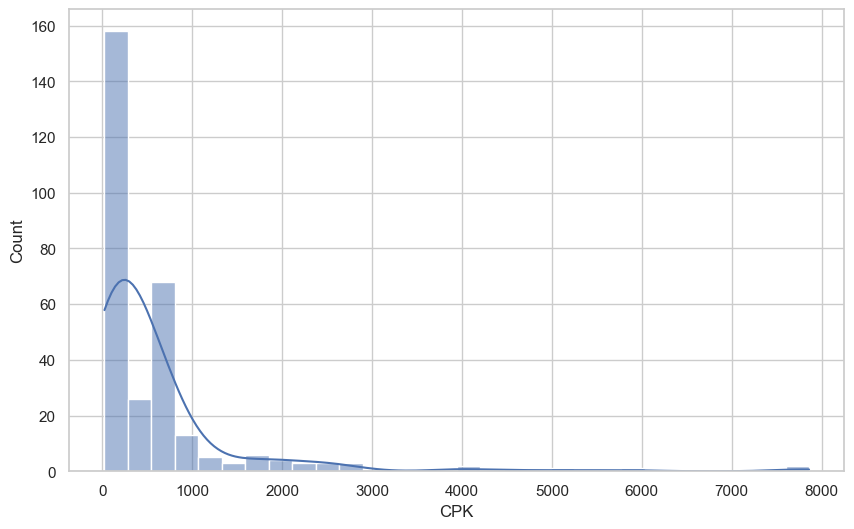

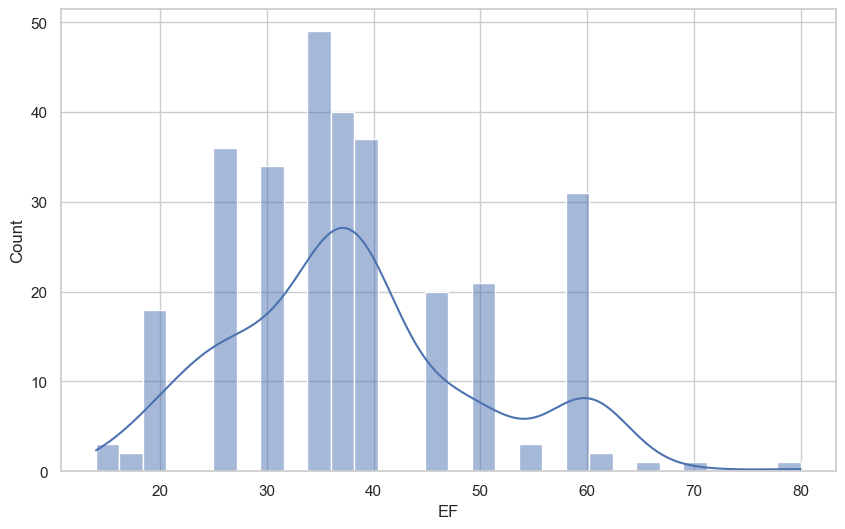

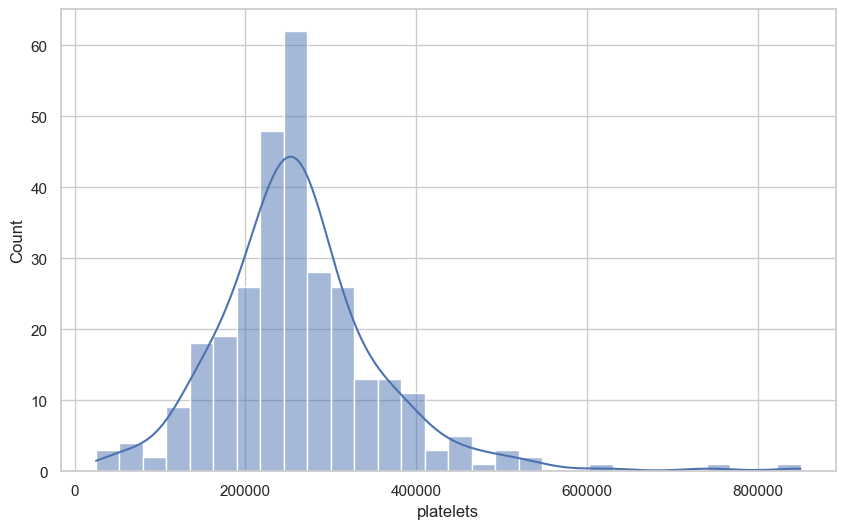

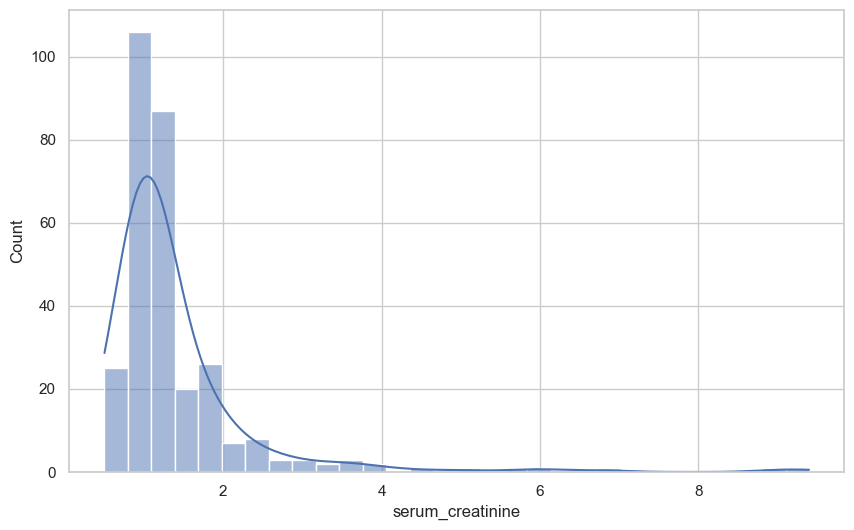

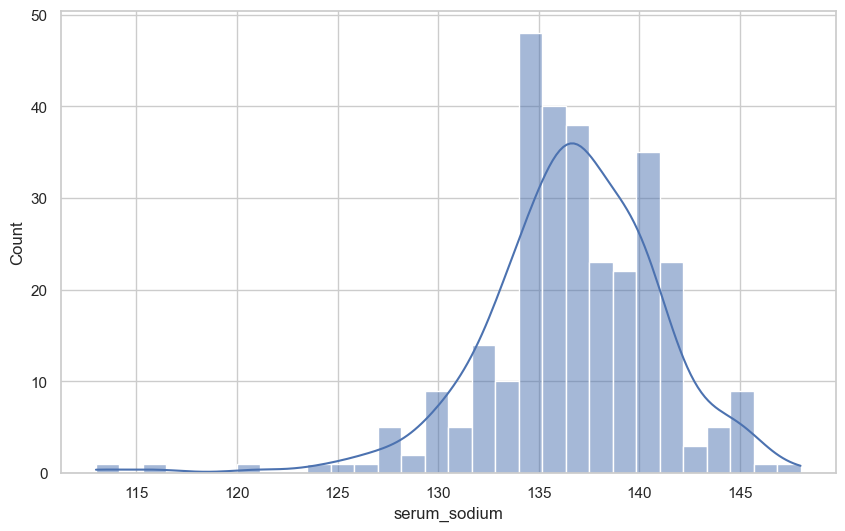

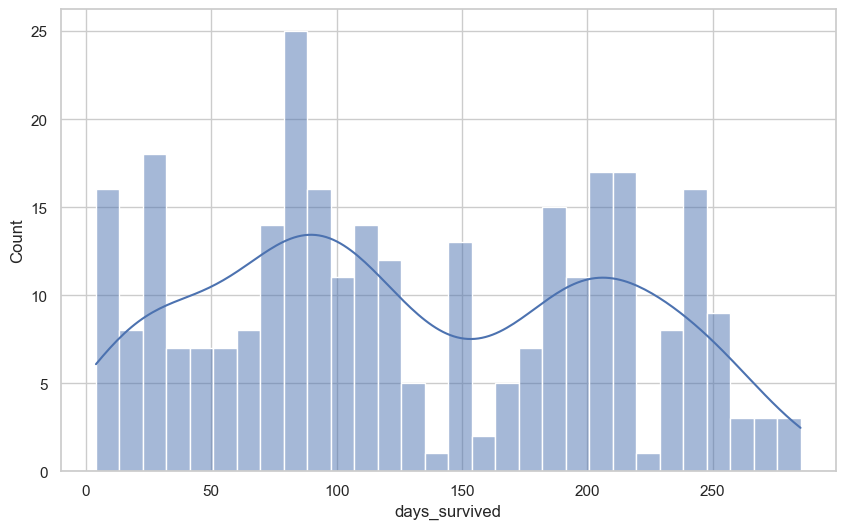

In [14]:
for col in numerical_features:
    sns.histplot(df[col], kde = True, bins = 30)
    plt.show()

#### Checking skewness of creatinine_phosphokinase 

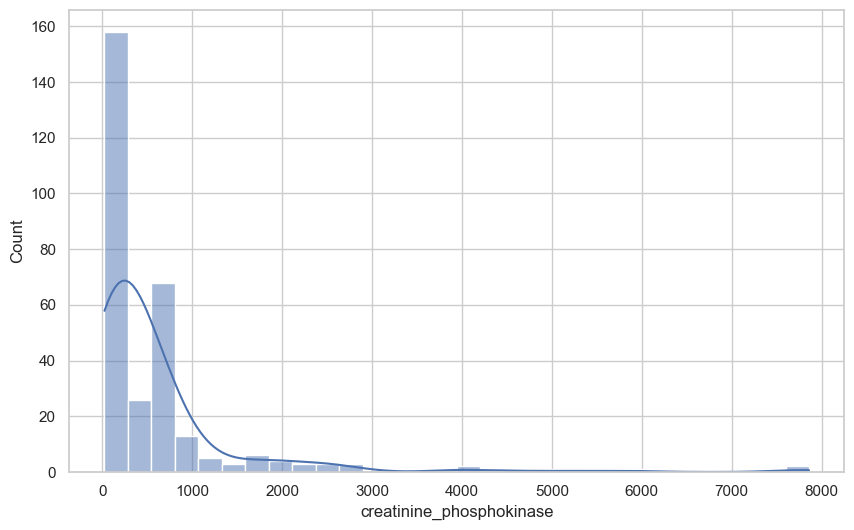

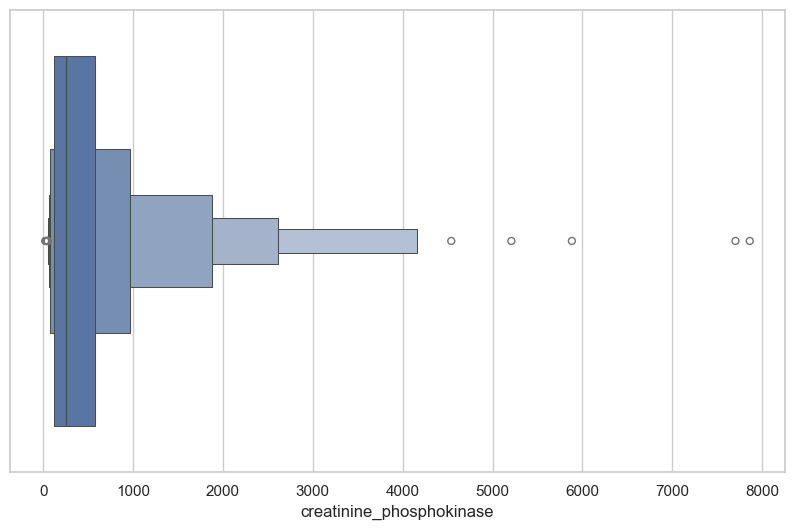

In [49]:
sns.histplot(df["creatinine_phosphokinase"], kde = True, bins = 30)
plt.show()

sns.boxenplot(x=df["creatinine_phosphokinase"])
plt.show()

### CPK Levels Insight and Inference
- The distribution of `creatine_phosphokinase` is **highly right-skewed**, with most patients having values in **normal range** and few patients with extremely high levels.
- The boxen plot confirms that while outliers exist at very high CPK levels, most patients cluster at the lower end of the scale.
- Importantly, this shows that most patients that suffered heartfailure still had **Normal levels of CPK**. This suggests that:
  - **CPK alone might not be a strong standalone predictor** of heart failure
  - Extremely high CPK values may still be clinically accurate, possibly inidcating acute or severe cases.
- To assess its role more insightfully:
  - A **grouped comparison** such as plotting CPK across survival vs death to check if distributions differ.
  - A **statistical test** like Mann-Whitney U test, since the data is skewed to check if those differences are significant.
- In practice, CPK levels may be treated as a **complementary feauture**, contributing to predictions only when combined with other clinical indicators.

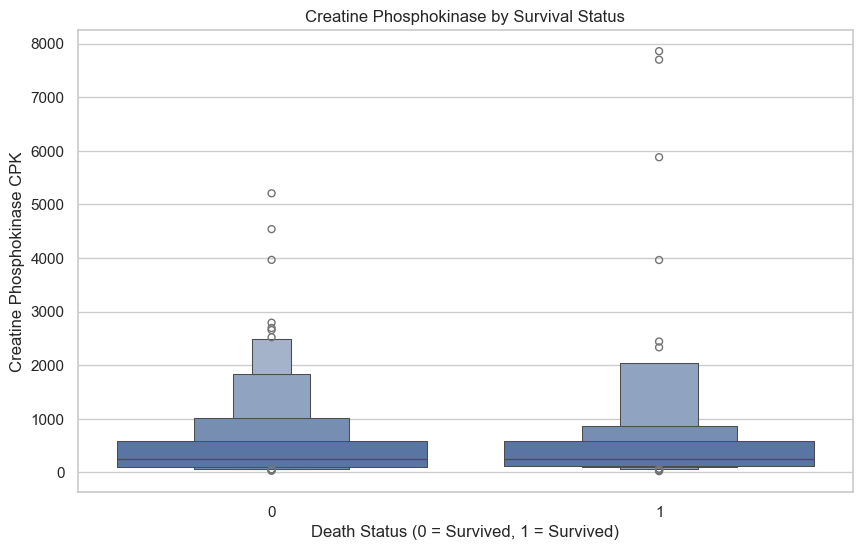

In [52]:
sns.boxenplot(x = "DEATH_EVENT", y = "creatinine_phosphokinase", data=df)
plt.title("Creatine Phosphokinase by Survival Status")
plt.xlabel("Death Status (0 = Survived, 1 = Survived)")
plt.ylabel("Creatine Phosphokinase CPK")
plt.show()

In [53]:
df.groupby("DEATH_EVENT")["creatinine_phosphokinase"].describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,540.054187,753.799572,30.0,109.00,245.0,582.0,5209.0
1,96.0,670.197917,1316.580640,23.0,128.75,259.0,582.0,7861.0


In [54]:
from scipy.stats import mannwhitneyu

survivors = df[df["DEATH_EVENT"] == 0]["creatinine_phosphokinase"]
deaths = df[df["DEATH_EVENT"] == 1]["creatinine_phosphokinase"]

stat, p = mannwhitneyu(survivors, deaths, alternative = "two-sided")
print(f"Mann-Whitney U statistic = {stat: .2f}, p-value = {p:.4f}")

Mann-Whitney U statistic =  9460.00, p-value = 0.6840


In [ ]:
sns.histplot(df["creatinine_phosphokinase"], kde = True, bins = 30)
plt.show()